In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd

/content


In [4]:
cd /content/drive/Shared\ drives/Casella/SpacePlasFest/msc/mariner/mariner2

/content/drive/Shared drives/Casella/SpacePlasFest/msc/mariner/mariner2


In [102]:
# Load necessary module
import os.path
from glob import glob
from ftplib import FTP_TLS
import numpy as np
from random import *
from datetime import *
import warnings
from glob import glob
from pathlib import Path
import pandas as pd
import h5py as hf

import matplotlib.pyplot as plt

In [13]:
!la

/bin/bash: la: command not found


### Mariner 2 dataset creation

In [58]:
df = pd.read_csv('mariner2_nbZB0DJ4Vt.csv')

In [59]:
df.head()

,Year,DOY,Hour,radial_distance,HGI_lat,HGI_long,vp,np
0,1962,242,0,999.999,9999.99,9999.99,9999.99,9999.99
1,1962,242,1,999.999,9999.99,9999.99,9999.99,9999.99
2,1962,242,2,999.999,9999.99,9999.99,9999.99,9999.99
3,1962,242,3,999.999,9999.99,9999.99,9999.99,9999.99
4,1962,242,4,999.999,9999.99,9999.99,9999.99,9999.99


In [60]:
tt = (np.asarray(df['Year'], dtype='datetime64[Y]')-1970)+(np.asarray(df['DOY'], dtype='timedelta64[D]')-1) + (np.asarray(df['Hour'], dtype='timedelta64[h]'))

In [61]:
df['datetime'] = tt

In [62]:
df.set_index('datetime', drop=True, inplace=True)

In [63]:
df.head()

,Year,DOY,Hour,radial_distance,HGI_lat,HGI_long,vp,np
datetime,,,,,,,,
1962-08-30 00:00:00,1962,242,0,999.999,9999.99,9999.99,9999.99,9999.99
1962-08-30 01:00:00,1962,242,1,999.999,9999.99,9999.99,9999.99,9999.99
1962-08-30 02:00:00,1962,242,2,999.999,9999.99,9999.99,9999.99,9999.99
1962-08-30 03:00:00,1962,242,3,999.999,9999.99,9999.99,9999.99,9999.99
1962-08-30 04:00:00,1962,242,4,999.999,9999.99,9999.99,9999.99,9999.99


In [66]:
df.drop(['Year', 'DOY', 'Hour'], axis=1, inplace=True);

In [67]:
df[df>900] = NaN

In [68]:
df.head()

,radial_distance,HGI_lat,HGI_long,vp,np
datetime,,,,,
1962-08-30 00:00:00,NaN,NaN,NaN,NaN,NaN
1962-08-30 01:00:00,NaN,NaN,NaN,NaN,NaN
1962-08-30 02:00:00,NaN,NaN,NaN,NaN,NaN
1962-08-30 03:00:00,NaN,NaN,NaN,NaN,NaN
1962-08-30 04:00:00,NaN,NaN,NaN,NaN,NaN


CPU times: user 76.8 ms, sys: 862 µs, total: 77.7 ms
Wall time: 77.7 ms


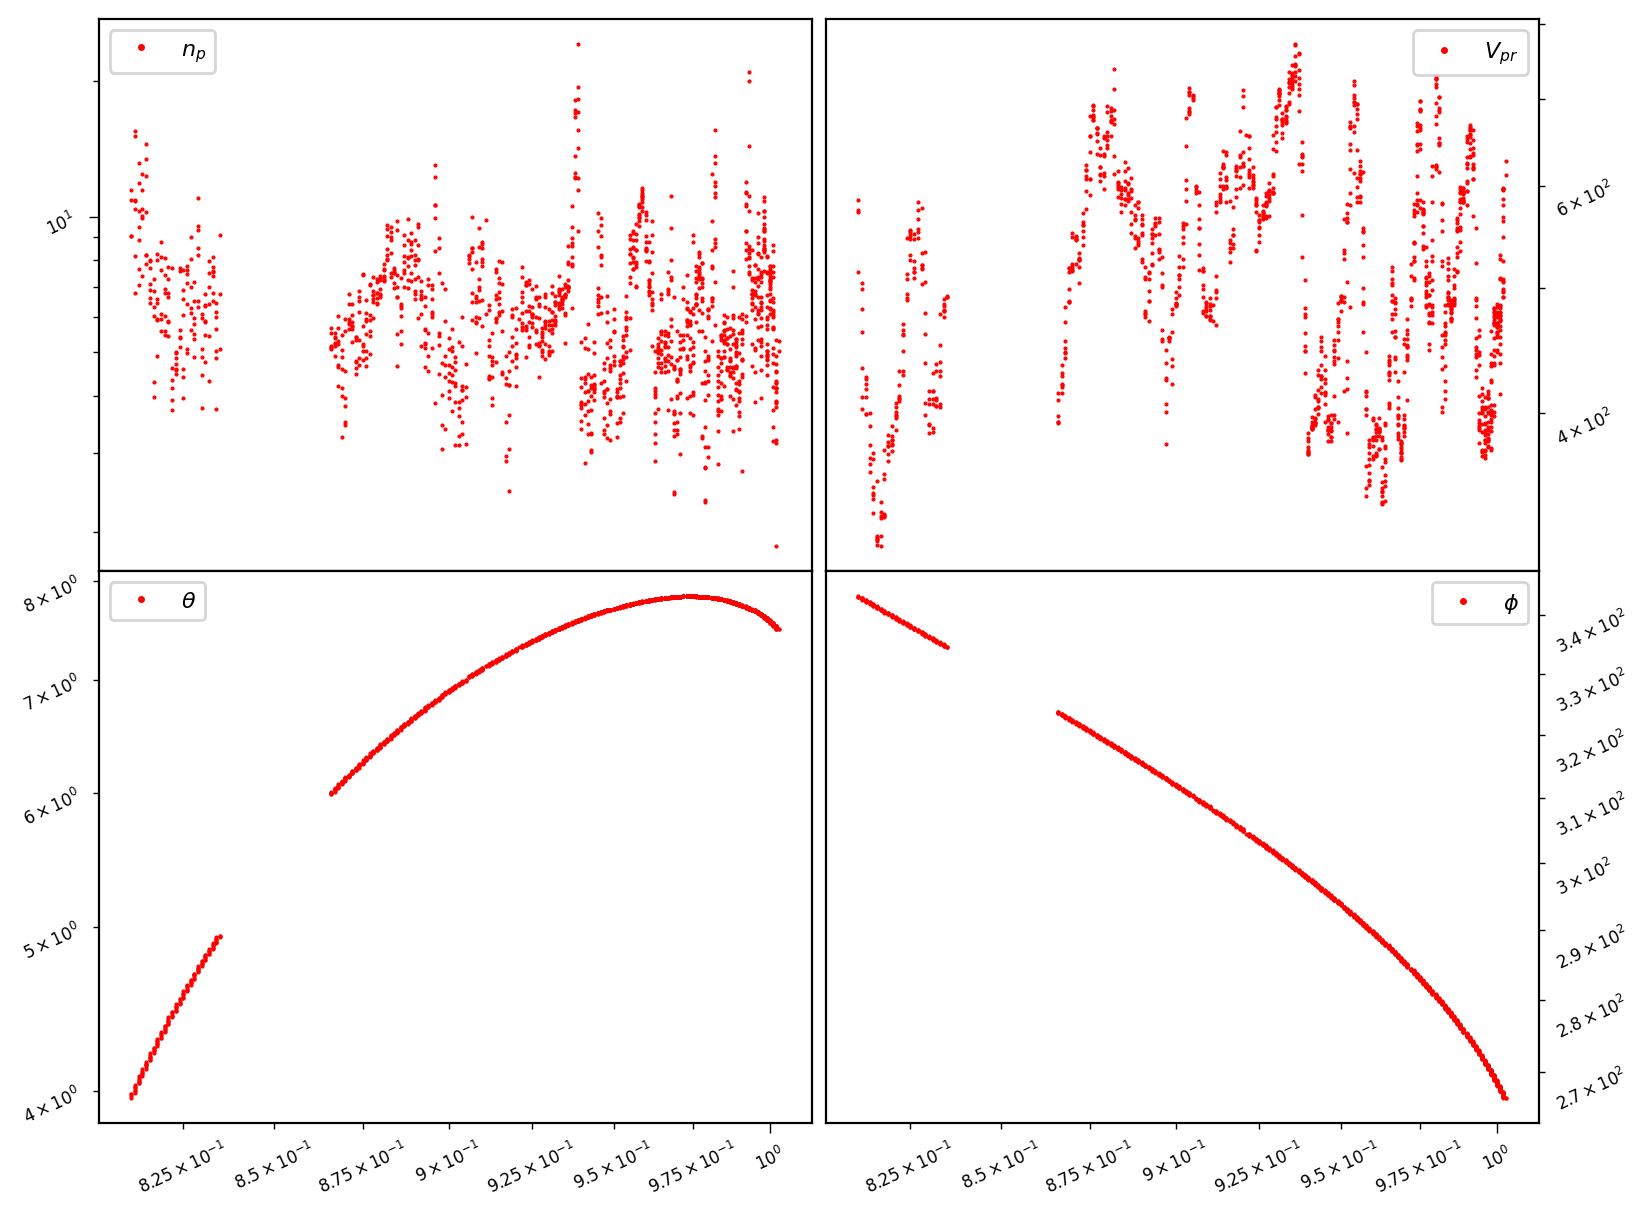

In [74]:
%%time

fig = plt.figure( num=None, figsize=( 8, 6 ), dpi=200, facecolor='w',
                 edgecolor='gray' )
fig.subplots_adjust( left=0.08, right=0.98, top=0.97, bottom=0.05,
                 wspace=0.02, hspace=0. )

axs1 = fig.add_subplot(2, 2, 1, sharex=None)
axs1.plot(df.radial_distance, df.np, 'r.', ms=1, label=r'$n_p$')
#axs1.plot(df.index, df.np_rolling, 'b.', ms=1, label='1Hr rolling average')
axs1.set_yscale('log')
axs1.set_xscale('log')
axs1.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, width=.5, labelsize=6, labelrotation=25 )

axs1.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

lgnd1 = axs1.legend(fontsize=8)
lgnd1.legendHandles[0]._legmarker.set_markersize(3)
#lgnd1.legendHandles[1]._legmarker.set_markersize(3)

axs2 = fig.add_subplot(2, 2, 2, sharex=None)
axs2.plot(df.radial_distance, df.vp, 'r.', ms=1, label=r'$V_{pr}$')
#axs2.plot(df.index, df.vp_rolling_r, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs2.set_yscale('log')
axs2.set_xscale('log')
axs2.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs2.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, labelright=True, right=True, width=.5, labelsize=6, labelrotation=25 )

lgnd2 = axs2.legend(fontsize=8)
lgnd2.legendHandles[0]._legmarker.set_markersize(3)
#lgnd2.legendHandles[1]._legmarker.set_markersize(3)

axs3 = fig.add_subplot(2, 2, 3, sharex=None)
axs3.plot(df.radial_distance, df.HGI_lat, 'r.', ms=1, label=r'$\theta$')
#axs3.plot(df.index, df.vp_rolling_t, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs3.set_yscale('log')
axs3.set_xscale('log')
axs3.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs3.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

lgnd3 = axs3.legend(fontsize=8)
lgnd3.legendHandles[0]._legmarker.set_markersize(3)
#lgnd3.legendHandles[1]._legmarker.set_markersize(3)

axs4 = fig.add_subplot(2, 2, 4, sharex=None)
axs4.plot(df.radial_distance, df.HGI_long, 'r.', ms=1, label=r'$\phi$')
#axs4.plot(df.index, df.vp_rolling_n, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs4.set_yscale('log')
axs4.set_xscale('log')
axs4.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs4.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, labelright=True, right=True, width=.5, labelsize=6, labelrotation=25 )

lgnd4 = axs4.legend(fontsize=8)
lgnd4.legendHandles[0]._legmarker.set_markersize(3)
#lgnd4.legendHandles[1]._legmarker.set_markersize(3)

In [75]:
dfn = pd.DataFrame(index=df.index)
dfn['np'] = df.np
dfn['vp_m'] = df.vp
dfn['sc_r'] = df.radial_distance
dfn['heliographicLatitude'] = df.HGI_lat
dfn['heliographicLongitude'] = df.HGI_long

In [78]:
dfnr = dfn.resample('1H').median()

In [106]:
!pwd

/content/drive/Shared drives/Casella/SpacePlasFest/msc/mariner/mariner2


In [107]:
fn = '/content/drive/Shared drives/Casella/SpacePlasFest/msc/data/merged_1hr/v01/mariner2__coho1hr_merged_mag_plasma_19620830_19621116_v01.hf'

In [108]:
hdf=hf.File(fn,'w')
hdf.create_dataset('datetime',data=(pd.Series(dfnr.index)-\
pd.datetime(1970,1,1,0,0,0,0)).dt.total_seconds())
for i in dfnr.columns[0:]: hdf.create_dataset(i,data=np.array(dfnr[i]))
hdf.close()

#pd.DataFrame.to_pickle( dfnr, nf, protocol=2 )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [109]:
dat = hf.File(fn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


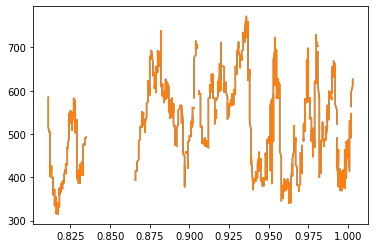

In [111]:
plt.plot(dat['sc_r'], dat['vp_m'])
plt.plot(dfn['sc_r'], dfn['vp_m'])

### Mariner10 dataset download and creation

In [141]:
df73 = pd.read_csv('/content/drive/Shared drives/Casella/SpacePlasFest/msc/mariner/mariner10/m10mag73.csv')
df74 = pd.read_csv('/content/drive/Shared drives/Casella/SpacePlasFest/msc/mariner/mariner10/m10mag74.csv')

In [142]:
df73.head()

,Year,DOY,Hour,radial_distance,carr_rot_num,carr_long,hgi_lat,earth_sun_spc_ang,b_x_seq,b_y_seq,b_z_seq,b_m,elev_ang,azm_ang
0,1973,307,14,0.992,1607,116.0,4.10,1.52,-5.310,-1.420,10.60,11.9,62.5,195.0
1,1973,307,15,0.992,1607,115.0,4.09,1.53,-1.130,3.310,5.24,6.3,56.3,109.0
2,1973,307,16,0.992,1607,115.0,4.09,1.53,-0.477,4.190,3.99,5.8,43.4,96.5
3,1973,307,17,0.992,1607,114.0,4.09,1.53,-1.220,2.940,3.18,4.5,45.0,113.0
4,1973,307,18,0.992,1607,114.0,4.09,1.53,3.500,-0.208,2.31,4.2,33.3,357.0


In [143]:
df74.head()

,Year,DOY,Hour,radial_distance,carr_rot_num,carr_long,hgi_lat,earth_sun_spc_ang,b_x_seq,b_y_seq,b_z_seq,b_m,elev_ang,azm_ang
0,1974,3,6,0.869,1609,41.4,-0.125,7.76,7.25,0.532,0.712,7.3,5.6,4.2
1,1974,3,7,0.869,1609,40.8,-0.132,7.77,6.69,-0.621,3.090,7.4,24.7,355.0
2,1974,3,8,0.869,1609,40.3,-0.132,7.78,7.73,-2.980,0.550,8.3,3.8,339.0
3,1974,3,9,0.868,1609,39.7,-0.139,7.80,8.84,1.310,2.210,9.2,13.9,8.4
4,1974,3,10,0.868,1609,39.2,-0.145,7.80,6.82,4.230,3.360,8.7,22.7,31.8


In [144]:
tt73 = (np.asarray(df73['Year'], dtype='datetime64[Y]')-1970)+(np.asarray(df73['DOY'], dtype='timedelta64[D]')-1) + (np.asarray(df73['Hour'], dtype='timedelta64[h]'))
tt74 = (np.asarray(df74['Year'], dtype='datetime64[Y]')-1970)+(np.asarray(df74['DOY'], dtype='timedelta64[D]')-1) + (np.asarray(df74['Hour'], dtype='timedelta64[h]'))

In [145]:
df73['datetime'] = tt73
df74['datetime'] = tt74

In [150]:
df73.set_index('datetime', drop=True, inplace=True)
df74.set_index('datetime', drop=True, inplace=True)

KeyError: ignored

In [151]:
df73.head()

,radial_distance,carr_rot_num,carr_long,hgi_lat,earth_sun_spc_ang,b_x_seq,b_y_seq,b_z_seq,b_m,elev_ang,azm_ang
datetime,,,,,,,,,,,
1973-11-03 14:00:00,0.992,1607,116.0,4.10,1.52,-5.310,-1.420,10.60,11.9,62.5,195.0
1973-11-03 15:00:00,0.992,1607,115.0,4.09,1.53,-1.130,3.310,5.24,6.3,56.3,109.0
1973-11-03 16:00:00,0.992,1607,115.0,4.09,1.53,-0.477,4.190,3.99,5.8,43.4,96.5
1973-11-03 17:00:00,0.992,1607,114.0,4.09,1.53,-1.220,2.940,3.18,4.5,45.0,113.0
1973-11-03 18:00:00,0.992,1607,114.0,4.09,1.53,3.500,-0.208,2.31,4.2,33.3,357.0


In [152]:
df74.head()

,radial_distance,carr_rot_num,carr_long,hgi_lat,earth_sun_spc_ang,b_x_seq,b_y_seq,b_z_seq,b_m,elev_ang,azm_ang
datetime,,,,,,,,,,,
1974-01-03 06:00:00,0.869,1609,41.4,-0.125,7.76,7.25,0.532,0.712,7.3,5.6,4.2
1974-01-03 07:00:00,0.869,1609,40.8,-0.132,7.77,6.69,-0.621,3.090,7.4,24.7,355.0
1974-01-03 08:00:00,0.869,1609,40.3,-0.132,7.78,7.73,-2.980,0.550,8.3,3.8,339.0
1974-01-03 09:00:00,0.868,1609,39.7,-0.139,7.80,8.84,1.310,2.210,9.2,13.9,8.4
1974-01-03 10:00:00,0.868,1609,39.2,-0.145,7.80,6.82,4.230,3.360,8.7,22.7,31.8


In [149]:
df73.drop(['Year', 'DOY', 'Hour'], axis=1, inplace=True)
df74.drop(['Year', 'DOY', 'Hour'], axis=1, inplace=True);

CPU times: user 75.2 ms, sys: 0 ns, total: 75.2 ms
Wall time: 75.3 ms


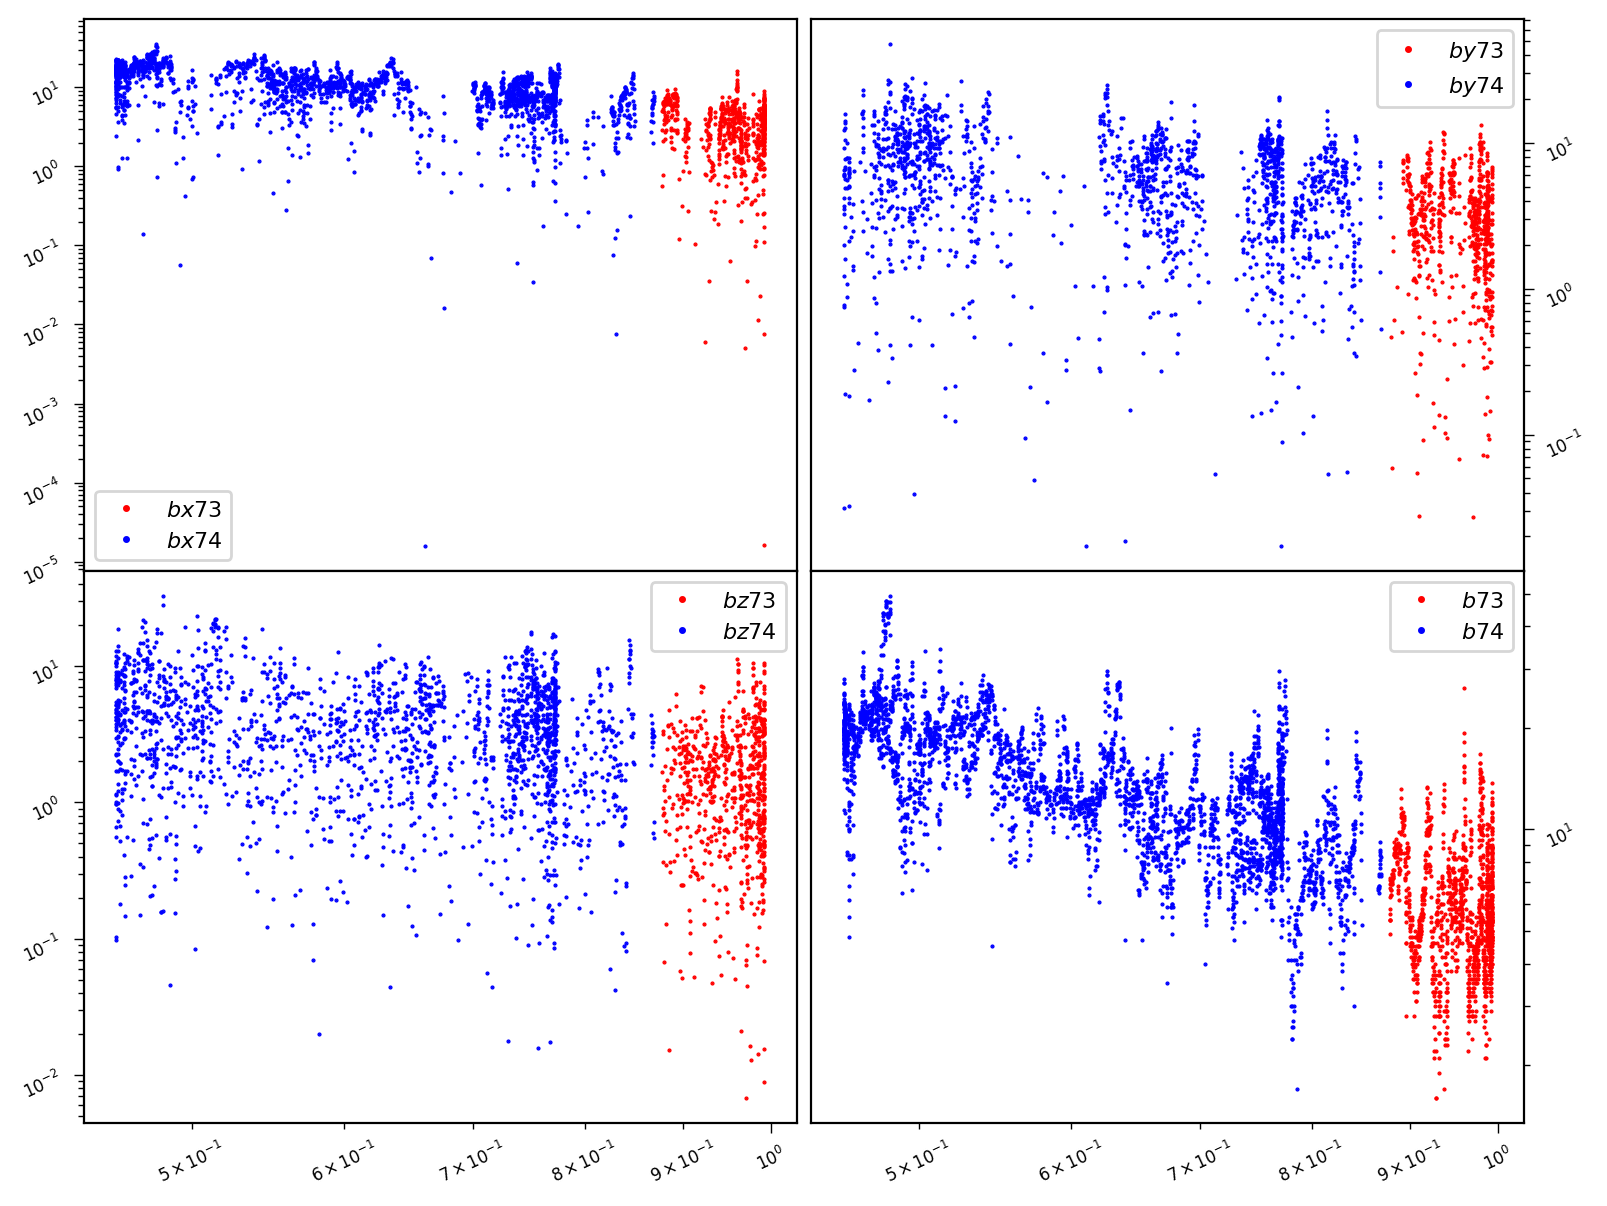

In [161]:
%%time

fig = plt.figure( num=None, figsize=( 8, 6 ), dpi=200, facecolor='w',
                 edgecolor='gray' )
fig.subplots_adjust( left=0.08, right=0.98, top=0.97, bottom=0.05,
                 wspace=0.02, hspace=0. )

axs1 = fig.add_subplot(2, 2, 1, sharex=None)
axs1.plot(df73.radial_distance, df73.b_x_seq, 'r.', ms=1, label=r'$bx73$')
axs1.plot(df74.radial_distance, df74.b_x_seq, 'b.', ms=1, label=r'$bx74$')
#axs1.plot(df.index, df.np_rolling, 'b.', ms=1, label='1Hr rolling average')
axs1.set_yscale('log')
axs1.set_xscale('log')
axs1.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, width=.5, labelsize=6, labelrotation=25 )

axs1.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

lgnd1 = axs1.legend(fontsize=8)
lgnd1.legendHandles[0]._legmarker.set_markersize(3)
lgnd1.legendHandles[1]._legmarker.set_markersize(3)

axs2 = fig.add_subplot(2, 2, 2, sharex=None)
axs2.plot(df73.radial_distance, df73.b_y_seq, 'r.', ms=1, label=r'$by73$')
axs2.plot(df74.radial_distance, df74.b_y_seq, 'b.', ms=1, label=r'$by74$')
#axs2.plot(df.index, df.vp_rolling_r, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs2.set_yscale('log')
axs2.set_xscale('log')
axs2.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs2.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, labelright=True, right=True, width=.5, labelsize=6, labelrotation=25 )

lgnd2 = axs2.legend(fontsize=8)
lgnd2.legendHandles[0]._legmarker.set_markersize(3)
lgnd2.legendHandles[1]._legmarker.set_markersize(3)

axs3 = fig.add_subplot(2, 2, 3, sharex=None)
axs3.plot(df73.radial_distance, df73.b_z_seq, 'r.', ms=1, label=r'$bz73$')
axs3.plot(df74.radial_distance, df74.b_z_seq, 'b.', ms=1, label=r'$bz74$')
#axs3.plot(df.index, df.vp_rolling_t, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs3.set_yscale('log')
axs3.set_xscale('log')
axs3.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs3.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

lgnd3 = axs3.legend(fontsize=8)
lgnd3.legendHandles[0]._legmarker.set_markersize(3)
lgnd3.legendHandles[1]._legmarker.set_markersize(3)

axs4 = fig.add_subplot(2, 2, 4, sharex=None)
axs4.plot(df73.radial_distance, df73.b_m, 'r.', ms=1, label=r'$b73$')
axs4.plot(df74.radial_distance, df74.b_m, 'b.', ms=1, label=r'$b74$')
#axs4.plot(df.index, df.vp_rolling_n, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs4.set_yscale('log')
axs4.set_xscale('log')
axs4.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs4.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, labelright=True, right=True, width=.5, labelsize=6, labelrotation=25 )

lgnd4 = axs4.legend(fontsize=8)
lgnd4.legendHandles[0]._legmarker.set_markersize(3)
lgnd4.legendHandles[1]._legmarker.set_markersize(3)

In [162]:
dfn73 = pd.DataFrame(index=df73.index)
dfn73['br'] = df73.b_x_seq
dfn73['bt'] = df73.b_y_seq
dfn73['bn'] = df73.b_z_seq
dfn73['bm'] = df73.b_m
dfn73['sc_r'] = df73.radial_distance

dfn73['heliographicLatitude'] = df73.hgi_lat
dfn73['heliographicLongitude'] = df73.carr_long

In [163]:
dfn74 = pd.DataFrame(index=df74.index)
dfn74['br'] = df74.b_x_seq
dfn74['bt'] = df74.b_y_seq
dfn74['bn'] = df74.b_z_seq
dfn74['bm'] = df74.b_m
dfn74['sc_r'] = df74.radial_distance

dfn74['heliographicLatitude'] = df74.hgi_lat
dfn74['heliographicLongitude'] = df74.carr_long

In [164]:
dfnr73 = dfn73.resample('1H').median()
dfnr74 = dfn74.resample('1H').median()

In [166]:
dfnr73.describe()

,br,bt,bn,bm,sc_r,heliographicLatitude,heliographicLongitude
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,0.245087,0.126226,0.213965,6.113140,0.954074,2.364990,176.600277
std,4.308819,4.262396,2.729119,2.624609,0.034609,1.176613,102.576155
min,-12.900000,-15.600000,-19.400000,1.600000,0.878000,0.091400,0.010300
25%,-3.205000,-3.030000,-1.195000,4.300000,0.927000,1.370000,88.550000
50%,0.742000,0.443000,0.285000,5.500000,0.964000,2.500000,173.000000
75%,3.615000,3.145000,1.660000,7.300000,0.986000,3.415000,266.000000
max,16.200000,13.300000,11.200000,26.200000,0.992000,4.100000,360.000000


In [167]:
dfnr74.describe()

,br,bt,bn,bm,sc_r,heliographicLatitude,heliographicLongitude
count,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000
mean,2.903977,-0.730002,0.636244,14.446984,0.629200,-1.541768,181.484726
std,11.224897,8.586453,6.186439,6.201944,0.122594,4.271236,100.053666
min,-28.200000,-32.300000,-46.600000,1.700000,0.457000,-6.680000,0.003170
25%,-6.695000,-6.615000,-2.430000,9.900000,0.506000,-5.085000,96.600000
50%,5.140000,-1.030000,0.942000,13.300000,0.625000,-2.500000,188.000000
75%,11.350000,5.540000,3.970000,18.600000,0.751000,0.167000,262.000000
max,35.200000,47.700000,32.600000,49.200000,0.869000,6.740000,360.000000


In [168]:
ldf = [dfnr73, dfnr74]
dfnr7374 = pd.concat(ldf)
dfnr7374.describe()

,br,bt,bn,bm,sc_r,heliographicLatitude,heliographicLongitude
count,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000
mean,2.184506,-0.498315,0.521979,12.191924,0.717108,-0.484636,180.163040
std,9.915351,7.670166,5.473882,6.605130,0.179224,4.085756,100.755481
min,-28.200000,-32.300000,-46.600000,1.600000,0.457000,-6.680000,0.003170
25%,-5.065000,-5.317500,-1.940000,7.100000,0.546000,-4.050000,93.750000
50%,2.560000,-0.421500,0.612500,11.100000,0.731000,-0.793500,185.000000
75%,9.065000,4.510000,3.230000,16.500000,0.894000,2.970000,263.000000
max,35.200000,47.700000,32.600000,49.200000,0.992000,6.740000,360.000000


In [169]:
print(dfnr7374.index.min(), dfnr7374.index.max())

1973-11-03 14:00:00 1974-09-18 23:00:00


In [170]:
fn7374 = '/content/drive/Shared drives/Casella/SpacePlasFest/msc/data/merged_1hr/v01/mariner10_coho1hr_merged_mag_plasma_19731103_19740918_v01.hf'

In [171]:
hdf=hf.File(fn7374,'w')
hdf.create_dataset('datetime',data=(pd.Series(dfnr7374.index)-\
pd.datetime(1970,1,1,0,0,0,0)).dt.total_seconds())
for i in dfnr7374.columns[0:]: hdf.create_dataset(i,data=np.array(dfnr7374[i]))
hdf.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [172]:
dat = hf.File(fn7374)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


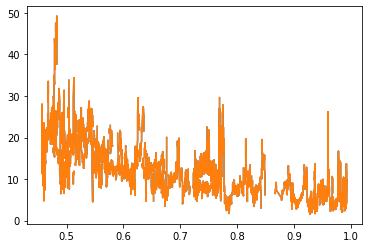

In [174]:
plt.plot(dat['sc_r'], dat['bm'])
plt.plot(dfnr7374['sc_r'], dfnr7374['bm'])

In [ ]:
def load_date( localpath, mission='mariner10', instrument='fields', 
                instrument_1 = None, level='l2', years=[2018], months=None, 
                dates=None) :

    ''' Define the function to download data from the NASA CDAWeb  for PSP 
    mission. It takes following parameters as input:
    localpath:
    mission:
    instrument:
    instrument_1:
    level:
    years:
    months:
    dates:
    '''

    for yy in years :
        for mm in months :
            for dd in dates:

                if mm < 10 :
                    mm = '0' + str(mm)
                if dd < 10 :
                    dd = '0' + str(dd)

                if instrument == 'sweap' :
                    directory = 'pub/data/' + mission + '/' + instrument + '/' + instrument_1 + \
                    '/' +  level + '/' + level + 'i' + '/' + str(yy) + '/'

                    fn = mission + '_swp_' + instrument_1 + '_' + level + 'i_'
                else:
                    if(level=='l3'):
                        level = 'l2'
                        print( warnings.warn(
                        "Fileds doesn't have level 3 data, downloading level 2 data") )

                    directory = mission + '/' + instrument + '/' + level + '/' + 'mag_rtn_4_per_cycle/' + str(yy)

                    fn = mission + '_fld_' + level + '_mag_rtn_4_sa_per_cyc_'

                fl0 = fn + str(yy) + str(mm) + str(dd) + '_v??.cdf'
                fl0_path = os.path.join( localpath, fl0 )
                gb = glob(fl0_path)
                try :
                    ftp = FTP_TLS( 'spdf.gsfc.nasa.gov' )
                    ftp.login( )
                    ftp.cwd(directory)
                    ls = ftp.nlst(fl0)
                    fl = ls[-1]
                    savepath = os.path.join(localpath, fl)
                    if(os.path.isfile(savepath)):
                        print(f'file already exists for {yy}/{mm}/{dd}, dowloading the next file in the list')
                    else:
                        ftp.retrbinary( 'RETR ' + fl, open( savepath, 'wb' ).write )
                        print(f'Data downloaded for {yy}/{mm}/{dd}')
                except :
                    print(f'Data not downloaded for {yy}/{mm}/{dd}. Something went wrong, obviously!')
                    pass
    print(f'All files downloaded')

In [ ]:
localpath = '/content/drive/Shared drives/Shadowfax/GIT/SpacePlasFest/qudsi/psp/data'
years = [2018]
months = arange(10,12)
dates = arange(1,5)
load_date(localpath=localpath, mission='psp', instrument='sweap', instrument_1='spc', level='l2', years=years, months=months, dates=dates)

Data not downloaded for 2018/10/01. Something went wrong, obviously!
Data not downloaded for 2018/10/02. Something went wrong, obviously!
Data not downloaded for 2018/10/03. Something went wrong, obviously!
Data not downloaded for 2018/10/04. Something went wrong, obviously!
file already exists for 2018/11/01, dowloading the next file in the list
file already exists for 2018/11/02, dowloading the next file in the list
Data downloaded for 2018/11/03
Data downloaded for 2018/11/04
All files downloaded


In [ ]:
!ls

psp_swp_spc_l2i_20181101_v01.cdf  psp_swp_spc_l3i_20181103_v01.cdf
psp_swp_spc_l2i_20181102_v01.cdf  psp_swp_spc_l3i_20181104_v01.cdf
psp_swp_spc_l2i_20181103_v01.cdf  psp_swp_spc_l3i_20181111_v01.cdf
psp_swp_spc_l2i_20181104_v01.cdf  psp_swp_spc_l3i_20181112_v01.cdf
psp_swp_spc_l3i_20181031_v01.cdf  psp_swp_spc_l3i_20190201_v01.cdf
psp_swp_spc_l3i_20181101_v01.cdf  psp_swp_spc_l3i_20190202_v01.cdf
psp_swp_spc_l3i_20181102_v01.cdf


In [ ]:
dat = CDF('psp_swp_spc_l3i_20181103_v01.cdf')

In [ ]:
dat.cdf_info()

In [ ]:
# Define a dictionary to save all the data in

def read_data_to_dataframe( filename, param_list) :
    '''Given a PSP CDF file, reads the data for a list of parameters to a 
    dataframe. 
    filename: Name of the file to be read
    param_list: A list of parameters to be saved in the dataframe. If Epoch is 
    not given as one of the parameter, the code appends it to the list
    '''

    # Make sure that time is one of the parameters in the list
    if('Epoch' not in param_list): param_list.append('Epoch')

    #Read the data from cdf file
    dat = CDF(filename)
    # Define an empty dictionary where you will save the data corresponding to
    # the param_list temporarily.
    d = {}
    # Set J2000 as the initial time since that is what SPC uses (in 
    # nanosecond format)
    t0 = datetime(2000, 1, 1, 12, 0)

    # Save time in UTC to the new dictionary
    d['Epoch'] = array([t0 + timedelta(microseconds=xx/1.e3) 
                                                for xx in dat['Epoch']])

    # Save all the parameters from param_list to the dictionary
    for parameter in param_list :
        if(parameter == 'Epoch') :
            continue
        else :
            d[parameter] = dat[parameter]

    # Define an empty dataframe to put all the data in
    df = pd.DataFrame(index=d['Epoch'])

    # Save all the parameters from param_list to the dataframe
    for key in d.keys() :
        if(key=='Epoch') :
            continue
        if(len(shape(d[key])) >1) :
            df[key+'_r'] = d[key][:,0]
            df[key+'_t'] = d[key][:,1]
            df[key+'_n'] = d[key][:,2]
        else :
            df[key] = d[key]

    return df
    #df.set_index('Epoch', drop=True, inplace=True)

In [ ]:
df = read_data_to_dataframe('psp_swp_spc_l3i_20181103_v01.cdf', param_list=['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI'])

In [ ]:
df.head()

,np_moment,wp_moment,vp_moment_RTN_r,vp_moment_RTN_t,vp_moment_RTN_n,sc_pos_HCI_r,sc_pos_HCI_t,sc_pos_HCI_n
2018-11-03 00:01:05.931132,330.154419,47.270313,285.080597,3.489344,53.603043,-2092157.875,29576164.0,118571.078125
2018-11-03 00:01:06.149592,319.398346,46.958584,284.055756,14.541323,47.094082,-2092174.750,29576156.0,118572.070312
2018-11-03 00:01:06.368032,340.165863,51.431702,279.223755,9.470245,53.340263,-2092191.625,29576148.0,118573.062500
2018-11-03 00:01:06.586492,358.756317,49.456974,278.678314,4.472992,41.111420,-2092208.500,29576140.0,118574.054688
2018-11-03 00:01:06.804932,373.646271,55.483166,277.305511,4.085647,65.487534,-2092225.375,29576132.0,118575.046875


In [ ]:
%%time
df[(df.np_moment<0) | (df.np_moment>1.e4)] = NaN
df['np_rolling'] = df.np_moment.rolling('1H').median()
df['vp_rolling_r'] = df.vp_moment_RTN_r.rolling('1H').median()
df['vp_rolling_t'] = df.vp_moment_RTN_t.rolling('1H').median()
df['vp_rolling_n'] = df.vp_moment_RTN_n.rolling('1H').median()

CPU times: user 1.17 s, sys: 0 ns, total: 1.17 s
Wall time: 1.17 s


In [ ]:
df.np_rolling.describe()

count    242859.000000
mean        304.878596
std          33.059320
min         239.426750
25%         281.329460
50%         309.102417
75%         327.360504
max         373.180389
Name: np_rolling, dtype: float64

CPU times: user 260 ms, sys: 44.1 ms, total: 304 ms
Wall time: 309 ms


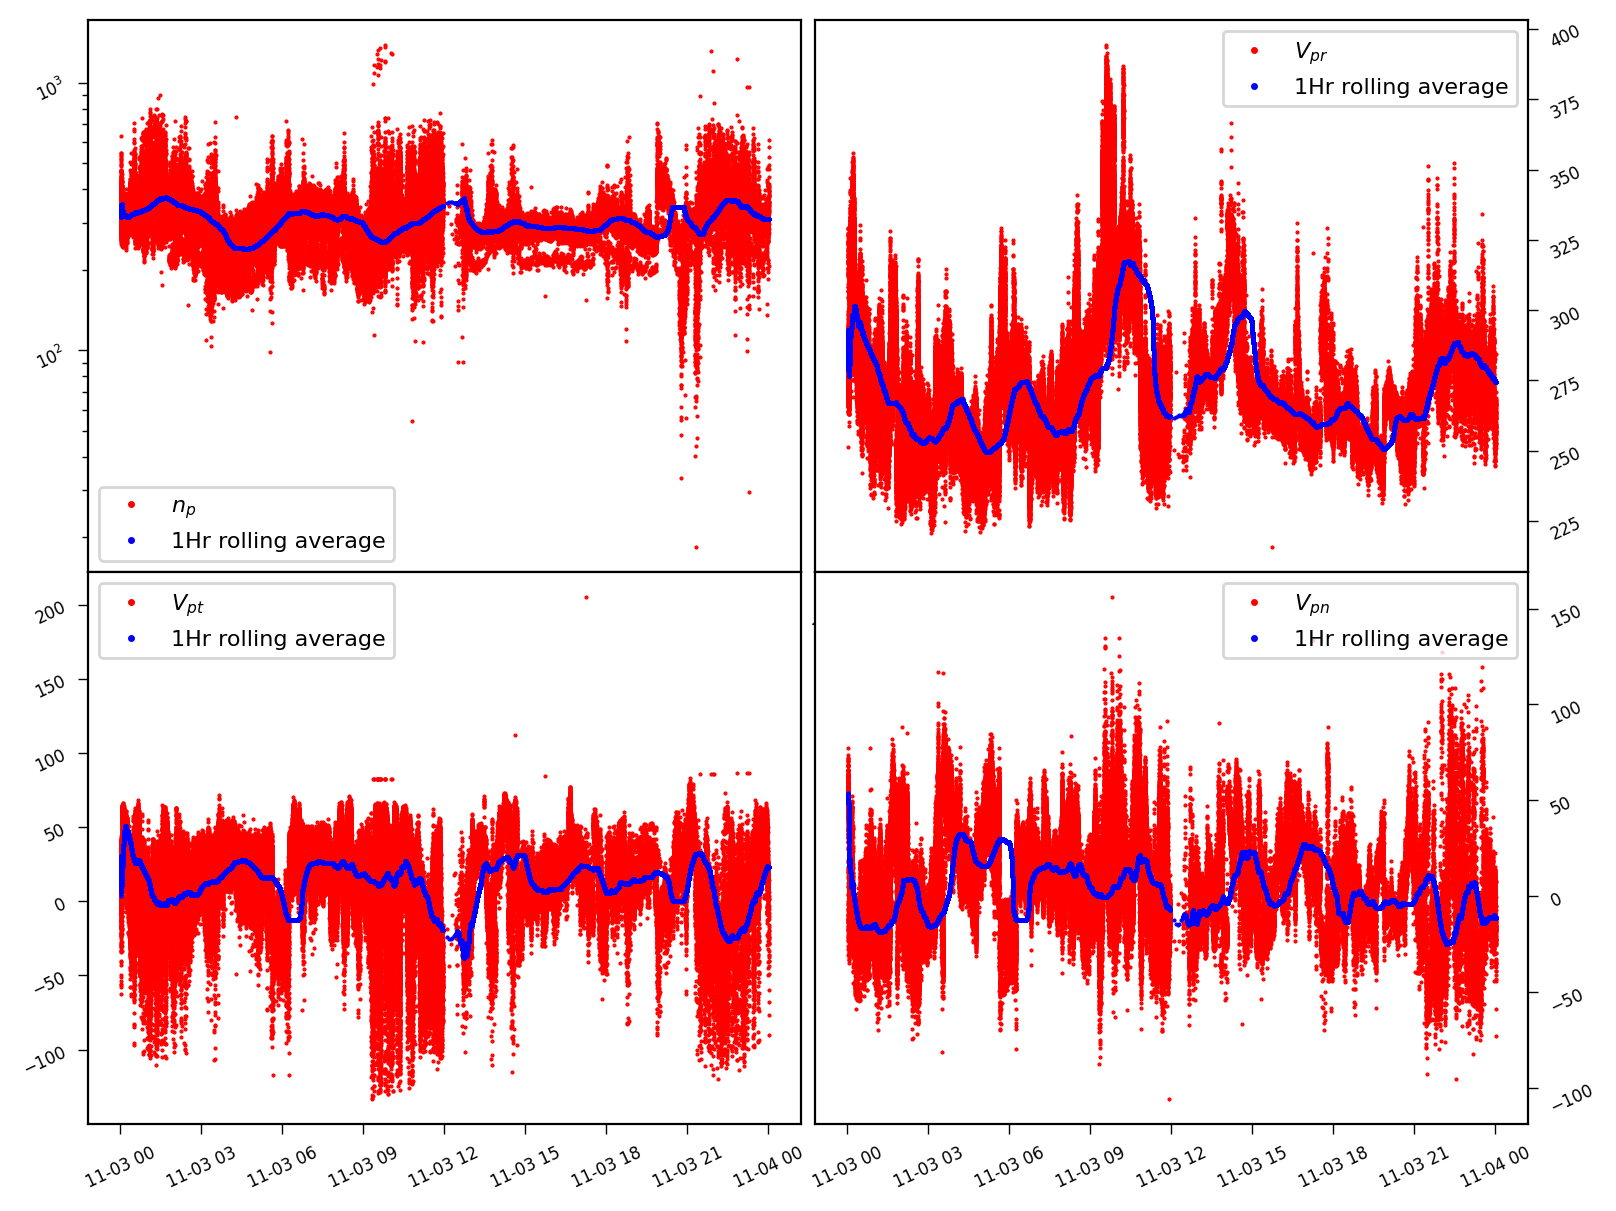

In [ ]:
%%time

fig = plt.figure( num=None, figsize=( 8, 6 ), dpi=200, facecolor='w',
                 edgecolor='gray' )
fig.subplots_adjust( left=0.08, right=0.98, top=0.97, bottom=0.05,
                 wspace=0.02, hspace=0. )

axs1 = fig.add_subplot(2, 2, 1, sharex=None)
axs1.plot(df.index, df.np_moment, 'r.', ms=1, label=r'$n_p$')
axs1.plot(df.index, df.np_rolling, 'b.', ms=1, label='1Hr rolling average')
axs1.set_yscale('log')
axs1.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, width=.5, labelsize=6, labelrotation=25 )

axs1.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

lgnd1 = axs1.legend(fontsize=8)
lgnd1.legendHandles[0]._legmarker.set_markersize(3)
lgnd1.legendHandles[1]._legmarker.set_markersize(3)

axs2 = fig.add_subplot(2, 2, 2, sharex=None)
axs2.plot(df.index, df.vp_moment_RTN_r, 'r.', ms=1, label=r'$V_{pr}$')
axs2.plot(df.index, df.vp_rolling_r, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs2.set_yscale('linear')
axs2.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs2.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, labelright=True, right=True, width=.5, labelsize=6, labelrotation=25 )

lgnd2 = axs2.legend(fontsize=8)
lgnd2.legendHandles[0]._legmarker.set_markersize(3)
lgnd2.legendHandles[1]._legmarker.set_markersize(3)

axs3 = fig.add_subplot(2, 2, 3, sharex=None)
axs3.plot(df.index, df.vp_moment_RTN_t, 'r.', ms=1, label=r'$V_{pt}$')
axs3.plot(df.index, df.vp_rolling_t, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs3.set_yscale('linear')
axs3.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs3.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

lgnd3 = axs3.legend(fontsize=8)
lgnd3.legendHandles[0]._legmarker.set_markersize(3)
lgnd3.legendHandles[1]._legmarker.set_markersize(3)

axs4 = fig.add_subplot(2, 2, 4, sharex=None)
axs4.plot(df.index, df.vp_moment_RTN_n, 'r.', ms=1, label=r'$V_{pn}$')
axs4.plot(df.index, df.vp_rolling_n, 'b.', ms=1, label='1Hr rolling average')
#plt.xscale('log')
axs4.set_yscale('linear')
axs4.get_xaxis().set_tick_params( which='both', direction='out',
labelbottom=True, bottom=True, width=.5, labelsize=6, labelrotation=25 )

axs4.get_yaxis().set_tick_params( which='both', direction='out',
labelbottom=False, bottom=False, labelright=True, right=True, width=.5, labelsize=6, labelrotation=25 )

lgnd4 = axs4.legend(fontsize=8)
lgnd4.legendHandles[0]._legmarker.set_markersize(3)
lgnd4.legendHandles[1]._legmarker.set_markersize(3)